In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dados/nova_plataforma.csv")

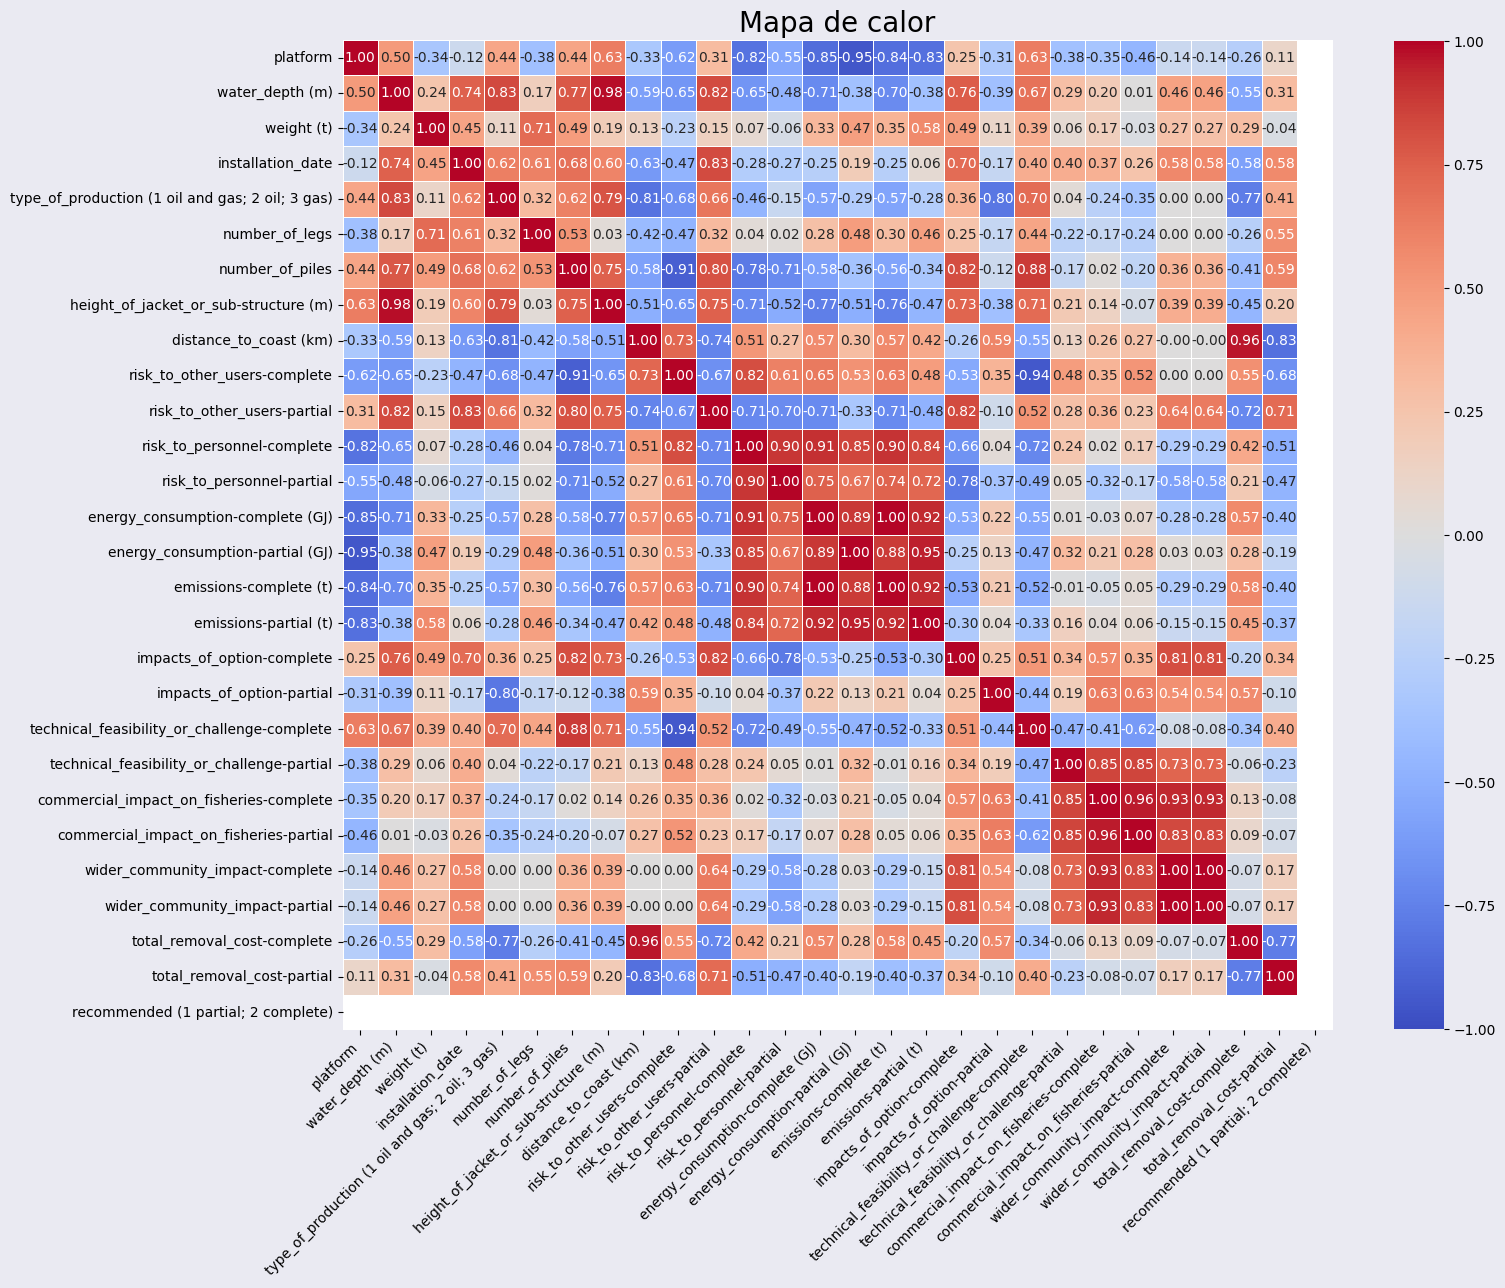

In [3]:
matriz_correlacao_gan = df.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao_gan,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de calor', fontsize=20)

plt.tight_layout()

plt.show()

### Função para treinar o modelo de regressão linear

In [4]:
def treinar_atributo(coluna_treinamento, coluna_alvo, dataframe):
    regressao_linear = LinearRegression()

    # Redimensionando os arrays de entrada
    X = dataframe[coluna_treinamento].values
    y = dataframe[coluna_alvo].values

    # Treinando o modelo
    regressao_linear.fit(X, y)
    return regressao_linear

### Função para mapear a coluna risk_to_others_users-complete

In [5]:
def mapear_0_ou_1(valor):
    if valor <= 0.5:
        return 0
    else:
        return 1

### Tratando plataforma 27

In [6]:
df = df.drop(5)

OBS: Para a plataforma 27, o treinamento tem que ocorrer sem a influência da mesma

#### Coluna risk_to_other_users-complete

In [7]:
df[["risk_to_personnel-complete", "risk_to_other_users-complete"]]

,risk_to_personnel-complete,risk_to_other_users-complete
0,0.290,1
1,0.320,1
2,0.025,0
3,0.040,0
4,0.090,0
6,0.140,1


In [8]:
risk_to_other_users_complete = treinar_atributo(["risk_to_personnel-complete"], "risk_to_other_users-complete", df)

##### Analisando a regressão

In [9]:
X = df["risk_to_personnel-complete"].values.reshape(-1, 1)
y = df["risk_to_other_users-complete"].values.reshape(-1, 1)

previsoes = risk_to_other_users_complete.predict(X)

# Aplicando a função a todos os elementos do array
vectorized_mapear = np.vectorize(mapear_0_ou_1)
previsoes = vectorized_mapear(previsoes)

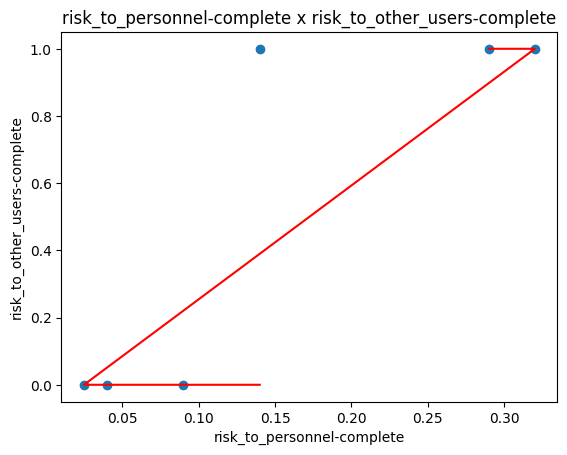

In [10]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("risk_to_personnel-complete x risk_to_other_users-complete");
plt.xlabel("risk_to_personnel-complete");
plt.ylabel("risk_to_other_users-complete");

#### Coluna risk_to_other_users-partil

In [11]:
df[["number_of_piles", "risk_to_other_users-partial"]]

,number_of_piles,risk_to_other_users-partial
0,8,0.000000e+00
1,9,0.000000e+00
2,26,2.300000e-05
3,32,1.500000e-05
4,20,7.800000e-08
6,5,0.000000e+00


In [12]:
risk_to_other_users_partial = treinar_atributo(["number_of_piles"], "risk_to_other_users-partial", df)

##### Analisando a regressão

In [13]:
X = df["number_of_piles"].values.reshape(-1, 1)
y = df["risk_to_other_users-partial"].values.reshape(-1, 1)

previsoes = risk_to_other_users_partial.predict(X)

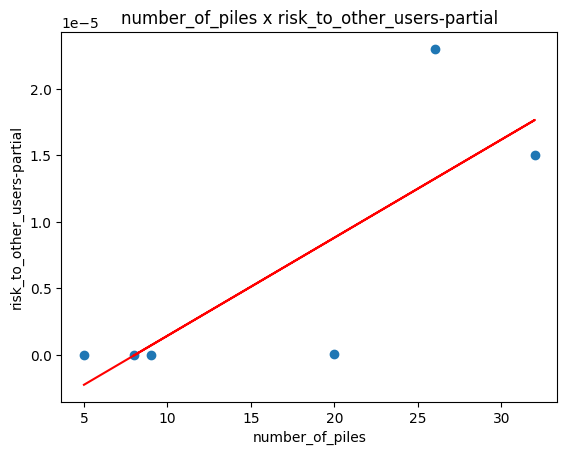

In [14]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("number_of_piles x risk_to_other_users-partial");
plt.xlabel("number_of_piles");
plt.ylabel("risk_to_other_users-partial");

#### Coluna total_removal_cost-complete

In [15]:
df[["distance_to_coast (km)", "total_removal_cost-complete"]]

,distance_to_coast (km),total_removal_cost-complete
0,269,1.00
1,259,1.00
2,120,0.53
3,240,1.00
4,230,1.00
6,282,1.00


In [16]:
total_removal_cost_complete = treinar_atributo(["distance_to_coast (km)"], "total_removal_cost-complete", df)

##### Analisando regressão

In [17]:
X = df["distance_to_coast (km)"].values.reshape(-1, 1)
y = df["total_removal_cost-complete"].values.reshape(-1, 1)

previsoes = total_removal_cost_complete.predict(X)

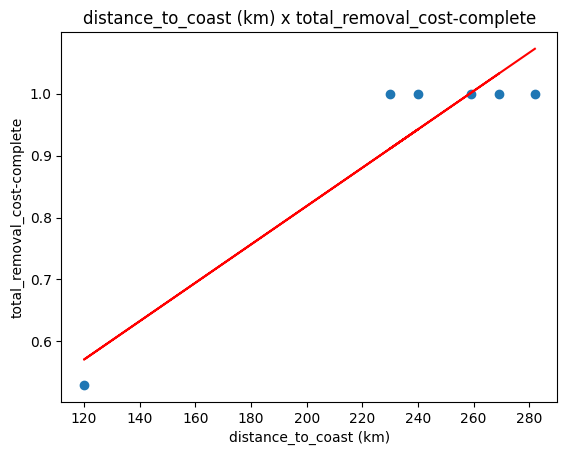

In [18]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("distance_to_coast (km) x total_removal_cost-complete");
plt.xlabel("distance_to_coast (km)");
plt.ylabel("total_removal_cost-complete");

#### Coluna total_removal_cost-partial

In [19]:
df[['installation_date', "total_removal_cost-partial"]]

,installation_date,total_removal_cost-partial
0,36,0.56
1,41,0.56
2,46,1.00
3,44,0.57
4,33,0.73
6,31,0.41


In [20]:
total_removal_cost_partial = treinar_atributo(["installation_date"], "total_removal_cost-partial", df)

##### Analisando a regressão

In [21]:
X = df["installation_date"].values.reshape(-1, 1)
y = df["total_removal_cost-partial"].values.reshape(-1, 1)

previsoes = total_removal_cost_partial.predict(X)

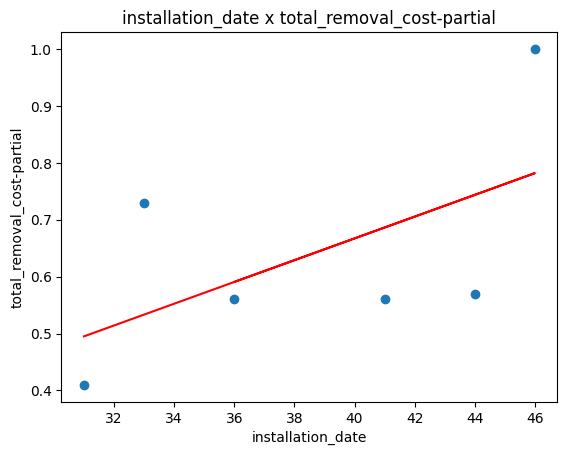

In [22]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("installation_date x total_removal_cost-partial");
plt.xlabel("installation_date");
plt.ylabel("total_removal_cost-partial");

### Tratando a Plataforma 26

In [23]:
df = pd.read_csv("../dados/nova_plataforma.csv")

In [24]:
df = df.drop(4)

#### Coluna impacts_of_option-complete

In [25]:
df[["number_of_piles", "impacts_of_option-complete"]]

,number_of_piles,impacts_of_option-complete
0,8,0.00
1,9,0.00
2,26,0.66
3,32,1.00
5,20,0.00
6,5,0.00


In [26]:
impacts_of_option_complete = treinar_atributo(["number_of_piles"], "impacts_of_option-complete", df)

##### Analisando regressão

In [27]:
X = df["number_of_piles"].values.reshape(-1, 1)
y = df["impacts_of_option-complete"].values.reshape(-1, 1)

previsoes = impacts_of_option_complete.predict(X)

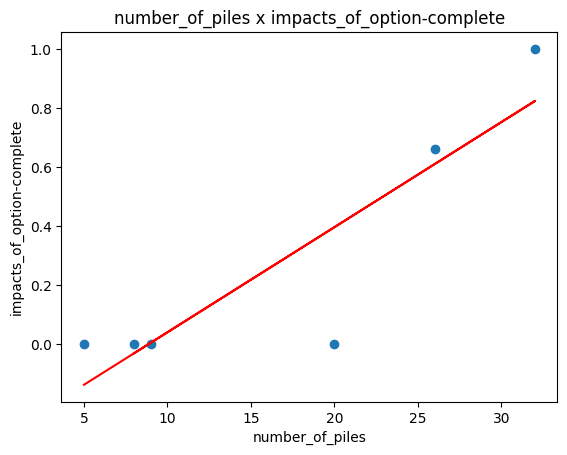

In [28]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("number_of_piles x impacts_of_option-complete");
plt.xlabel("number_of_piles");
plt.ylabel("impacts_of_option-complete");

#### Coluna impacts_of_option-partial

In [29]:
df[["commercial_impact_on_fisheries-partial", "impacts_of_option-complete"]]

,commercial_impact_on_fisheries-partial,impacts_of_option-complete
0,0.78,0.00
1,0.78,0.00
2,0.94,0.66
3,0.66,1.00
5,0.00,0.00
6,0.78,0.00


In [30]:
impacts_of_option_partial = treinar_atributo(["commercial_impact_on_fisheries-partial"], "impacts_of_option-complete", df)

##### Analisando a regressão linear

In [31]:
X = df["commercial_impact_on_fisheries-partial"].values.reshape(-1, 1)
y = df["impacts_of_option-complete"].values.reshape(-1, 1)

previsoes = impacts_of_option_partial.predict(X)

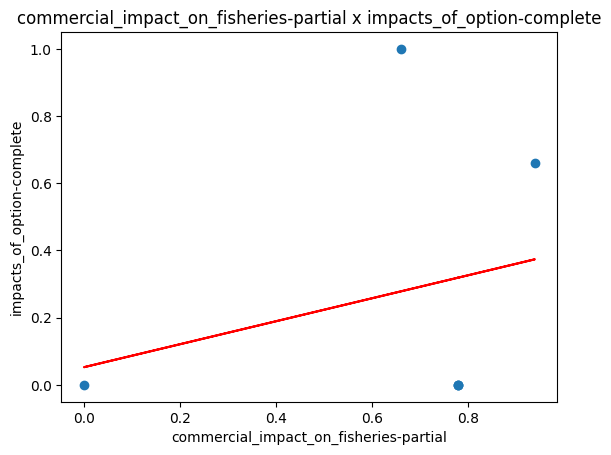

In [32]:
plt.plot(X, y, 'o');
plt.plot(X, previsoes, color='red');

# Descrição
plt.title("commercial_impact_on_fisheries-partial x impacts_of_option-complete");
plt.xlabel("commercial_impact_on_fisheries-partial");
plt.ylabel("impacts_of_option-complete");

### Novos valores para as colunas faltantes

#### Plataforma 27

In [33]:
p27_risk_to_other_users_complete = mapear_0_ou_1(risk_to_other_users_complete.predict([[0.14]])[0]) # Fornece a coluna risk_to_personnel-complete
p27_risk_to_other_users_partial = risk_to_other_users_partial.predict([[20]])[0] # Fornece a coluna number_of_piles
p27_total_removal_cost_complete = round(total_removal_cost_complete.predict([[130]])[0], 3) # Fornece a coluna distance_to_coast (km)
p27_total_removal_cost_partial = round(total_removal_cost_partial.predict([[41]])[0], 3) # Fornece a coluna installation_date

print(f"risk_to_other_users_complete: {p27_risk_to_other_users_complete}")
print(f"risk_to_other_users_partial: {p27_risk_to_other_users_partial}")
print(f"total_removal_cost_complete: {p27_total_removal_cost_complete}")
print(f"total_removal_cost_partial: {p27_total_removal_cost_partial}")

risk_to_other_users_complete: 0
risk_to_other_users_partial: 8.804491712707182e-06
total_removal_cost_complete: 0.602
total_removal_cost_partial: 0.686


#### Plataforma 26

In [34]:
p26_impacts_of_option_complete = round(impacts_of_option_complete.predict([[20]])[0], 3) # Fornece a coluna number_of_piles
p26_impacts_of_option_partial = round(impacts_of_option_partial.predict([[0]])[0], 3) # Fornece a coluna commercial_impact_on_fisheries-partial

print(f"impacts_of_option_complete: {p26_impacts_of_option_complete}")
print(f"impacts_of_option_partial: {p26_impacts_of_option_partial}")

impacts_of_option_complete: 0.395
impacts_of_option_partial: 0.052


#### Mediana para as colunas impacts_of_option

In [35]:
df = pd.read_csv("../dados/nova_plataforma.csv")

In [36]:
df = df.drop(4)

In [37]:
df["impacts_of_option-complete"].median(), df["impacts_of_option-partial"].median()

(0.0, 1.0)

In [38]:
df["impacts_of_option-complete"].mean(), df["impacts_of_option-partial"].mean()

(0.27666666666666667, 0.8333333333333334)